In [1]:
cd drive/My\ Drive/concrete_crack

/content/drive/My Drive/concrete_crack


In [2]:
!pip install --upgrade tensorflow==1.14

     |████████████████████████████████| 109.2MB 78kB/s 
     |████████████████████████████████| 491kB 33.7MB/s 
     |████████████████████████████████| 3.2MB 42.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [0]:
#!git clone https://github.com/danielenricocahall/One-Class-NeuralNetwork.git

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cd One-Class-NeuralNetwork/

/content/drive/My Drive/concrete_crack/One-Class-NeuralNetwork


In [0]:
from sklearn.decomposition import PCA

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [8]:
from ocnn import OneClassNeuralNetwork

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [9]:
cd ..

/content/drive/My Drive/concrete_crack


In [10]:
cd data_64/

/content/drive/My Drive/concrete_crack/data_64


In [11]:
ls

rescaled_negative_data.npy  X_test_positive_balanced.npy
rescaled_positive_data.npy  X_test_positive_imbalanced.npy
X_test_balanced.npy         X_train_encoded.npy
X_test_imbalanced.npy       X_train.npy
X_test_negative.npy


In [0]:
X_train = np.load('X_train_encoded.npy', allow_pickle=True)

In [13]:
cd ..

/content/drive/My Drive/concrete_crack


In [14]:
cd encoded_decoded_data_64/

/content/drive/My Drive/concrete_crack/encoded_decoded_data_64


In [15]:
ls

balanced/      dec2_i_64.npy  dec4_i_28.npy  enc2_b_64.npy  enc4_b_64.npy
dec1_b_64.npy  dec3_b_64.npy  dec4_i_64.npy  enc2_i_64.npy  enc4_i_28.npy
dec1_i_64.npy  dec3_i_64.npy  enc1_b_64.npy  enc3_b_64.npy  enc4_i_64.npy
dec2_b_64.npy  dec4_b_64.npy  enc1_i_64.npy  enc3_i_64.npy  imbalanced/


In [0]:
X_val_balanced = np.load('enc4_b_64.npy', allow_pickle=True)
X_val_imbalanced = np.load('enc4_i_64.npy', allow_pickle=True)

In [17]:
X_train.shape

(16000, 128)

In [18]:
X_val_balanced.shape

(8000, 128)

In [19]:
X_val_imbalanced.shape

(4500, 128)

In [0]:
pca = PCA(n_components=64)

In [0]:
scaler = StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_balanced_scaled = scaler.fit_transform(X_val_balanced)
X_val_imbalanced_scaled = scaler.fit_transform(X_val_imbalanced)

In [0]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_balanced_pca = pca.fit_transform(X_val_balanced_scaled)
X_val_imbalanced_pca = pca.fit_transform(X_val_imbalanced_scaled)

In [24]:
cd ..

/content/drive/My Drive/concrete_crack


In [25]:
cd ocnn_model/

/content/drive/My Drive/concrete_crack/ocnn_model


In [0]:
num_features = X_train_pca.shape[1]
num_hidden = 32
r = 1.0
epochs = 1000
nu_balanced = 4000/8000
nu_imbalanced = 500/4500

In [0]:
oc_nn = OneClassNeuralNetwork(num_features, num_hidden, r)

In [28]:
model_balanced, history_balanced = oc_nn.train_model(X_train_pca, epochs = epochs, nu = nu_balanced)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
1/1 [==============================] - 0s 118ms/step - loss: 23.1683 - r: 1.0000 - quantile_loss: 0.9713
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 23.0687 - r: 1.0000 - quantile_loss: 0.8717
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 22.9787 - r: 1.0000 - quantile_loss: 0.7817
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 22.9106 - r: 1.0000 - quantile_loss: 0.7136
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 2

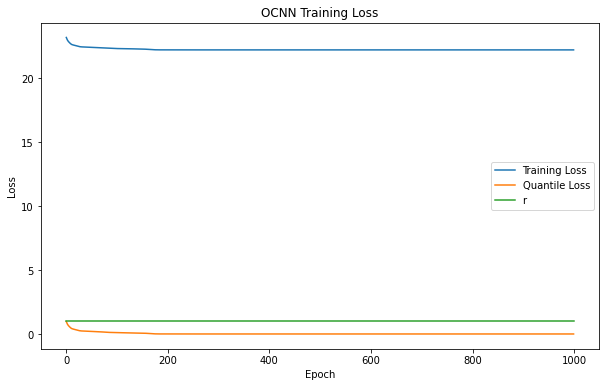

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(history_balanced.epoch, history_balanced.history['loss'], label = 'Training Loss')
plt.plot(history_balanced.epoch, history_balanced.history['quantile_loss'], label = 'Quantile Loss')
plt.plot(history_balanced.epoch, history_balanced.history['r'], label = 'r')
plt.title('OCNN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'center right')
plt.show()

In [0]:
balanced_label_normal = np.array([0]*4000)
balanced_label_anomalous = np.array([1]*4000)
y_true_balanced = np.concatenate([balanced_label_normal, balanced_label_anomalous])

In [0]:
y_pred_balanced = model_balanced.predict(X_val_balanced_pca)

In [32]:
np.unique(y_pred_balanced)

array([0.0000000e+00, 5.9604645e-08, 1.1920929e-07, ..., 9.9999988e-01,
       9.9999994e-01, 1.0000000e+00], dtype=float32)

In [0]:
r = history_balanced.history['r'].pop()

In [0]:
s_n_balanced = [y_pred_balanced[i, 0] - r >= 0 for i in range(len(y_pred_balanced))]

In [0]:
frac_of_outliers_balanced = len([s for s in s_n_balanced if s == 0])/len(s_n_balanced)

In [36]:
frac_of_outliers_balanced

0.7905

In [0]:
fpr_b, tpr_b, thresh_b = roc_curve(y_true_balanced, y_pred_balanced)

In [0]:
roc_auc_balanced = auc(fpr_b, tpr_b)

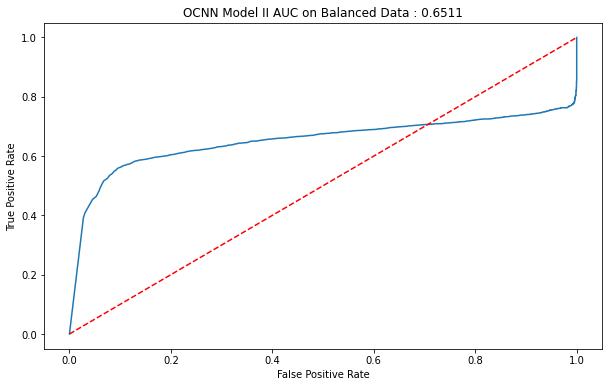

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_b, tpr_b)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OCNN Model II AUC on Balanced Data : %0.4f'%(roc_auc_balanced))
plt.show()

In [0]:
precision_b, recall_b, threshold_b = precision_recall_curve(y_true_balanced, y_pred_balanced)

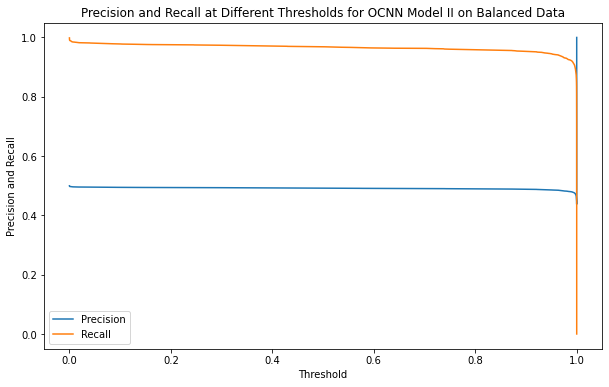

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_b, precision_b[1:], label = 'Precision')
plt.plot(threshold_b, recall_b[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for OCNN Model II on Balanced Data')
plt.legend()
plt.show()

In [0]:
oc_nn = OneClassNeuralNetwork(num_features, num_hidden, r)

In [46]:
model_imbalanced, history_imbalanced = oc_nn.train_model(X_train_pca, epochs = 1000, nu = nu_imbalanced)

Epoch 1/1000
1/1 [==============================] - 0s 91ms/step - loss: 26.8508 - r: 1.0000 - quantile_loss: 4.5072
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 26.5601 - r: 1.0000 - quantile_loss: 4.2165
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 26.3916 - r: 1.0000 - quantile_loss: 4.0480
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 26.1471 - r: 1.0000 - quantile_loss: 3.8035
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 25.8912 - r: 1.0000 - quantile_loss: 3.5476
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 25.6651 - r: 1.0000 - quantile_loss: 3.3215
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 25.4765 - r: 1.0000 - quantile_loss: 3.1329
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 25.3234 - r: 1.0000 - quantile_loss: 2.9798
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step 

In [0]:
imbalanced_label_normal = np.array([0]*4000)
imbalanced_label_anomalous = np.array([1]*500)
y_true_imbalanced = np.concatenate([imbalanced_label_normal, imbalanced_label_anomalous])

In [0]:
y_pred_imbalanced = model_imbalanced.predict(X_val_imbalanced_pca)

In [49]:
np.unique(y_pred_imbalanced)

array([0.00000000e+00, 2.56299973e-06, 3.18884850e-06, 6.70552254e-06,
       8.04662704e-06, 8.43405724e-05, 1.17212534e-04, 1.65790319e-04,
       3.17335129e-04, 6.28590584e-04, 7.70866871e-04, 3.09103727e-03,
       3.26818228e-03, 6.14407659e-03, 8.89846683e-03, 1.06498897e-02,
       1.24432743e-02, 1.26157105e-02, 1.90206468e-02, 5.45684099e-02,
       5.51445484e-02, 5.80484569e-02, 5.81728518e-02, 6.46770000e-02,
       8.92788172e-02, 9.82249081e-02, 1.31906718e-01, 1.43143147e-01,
       1.55240268e-01, 1.81938142e-01, 2.19213277e-01, 2.22149104e-01,
       3.99698019e-01, 5.74386477e-01, 6.60149574e-01, 6.74962878e-01,
       6.91346228e-01, 6.92723036e-01, 7.01660514e-01, 7.40040183e-01,
       7.90149152e-01, 7.93769240e-01, 8.28379393e-01, 8.33040357e-01,
       8.55830550e-01, 8.96811247e-01, 9.11090255e-01, 9.13812876e-01,
       9.16271329e-01, 9.19963479e-01, 9.21744883e-01, 9.29890871e-01,
       9.36509967e-01, 9.43150103e-01, 9.51750755e-01, 9.60296452e-01,
      

In [0]:
r = history_imbalanced.history['r'].pop()

In [0]:
s_n_imbalanced = [y_pred_imbalanced[i, 0] - r >= 0 for i in range(len(y_pred_imbalanced))]

In [0]:
frac_of_outliers_imbalanced = len([s for s in s_n_imbalanced if s == 0])/len(s_n_imbalanced)

In [53]:
frac_of_outliers_imbalanced

0.9697777777777777

In [0]:
fpr_i, tpr_i, thresh_i = roc_curve(y_true_imbalanced, y_pred_imbalanced)
roc_auc_imbalanced = auc(fpr_i, tpr_i)

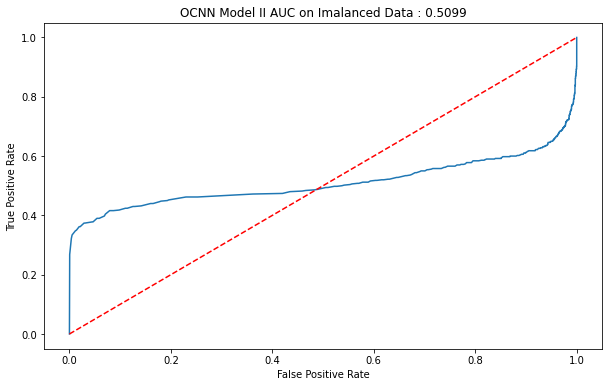

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_i, tpr_i)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OCNN Model II AUC on Imalanced Data : %0.4f'%(roc_auc_imbalanced))
plt.show()

In [0]:
precision_i, recall_i, threshold_i = precision_recall_curve(y_true_imbalanced, y_pred_imbalanced)

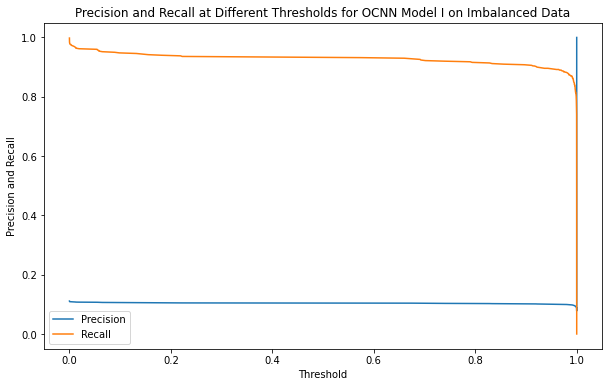

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_i, precision_i[1:], label = 'Precision')
plt.plot(threshold_i, recall_i[1:], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall at Different Thresholds for OCNN Model I on Imbalanced Data')
plt.legend()
plt.show()